In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lightgbm as lgbm
from sklearn.metrics import log_loss
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import shutil
import xgboost as xgb

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/train/train.csv')

In [17]:
def run(features, label, df, clf,verbose = True):
    print(features[-1])
    X = df
    y = df[label]
    Loss = []
    T = X.context_timestamp <= '2018-09-23 23:59:59'
    X_train, X_test = X[T], X[~T]
    X_train, X_test = X_train[features], X_test[features]
    y_train, y_test = y[T], y[~T]
    clf.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=verbose,early_stopping_rounds=200)
    predict = clf.predict_proba(X_test)[:,1]
    logloss = log_loss(y_test, predict)
    print(logloss)
    return clf

33
item_property_list0
[1]	training's binary_logloss: 0.648023	valid_1's binary_logloss: 0.64779
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607197	valid_1's binary_logloss: 0.606742
[3]	training's binary_logloss: 0.5701	valid_1's binary_logloss: 0.569432
[4]	training's binary_logloss: 0.536261	valid_1's binary_logloss: 0.535397
[5]	training's binary_logloss: 0.505292	valid_1's binary_logloss: 0.504237
[6]	training's binary_logloss: 0.476866	valid_1's binary_logloss: 0.475624
[7]	training's binary_logloss: 0.45071	valid_1's binary_logloss: 0.449293
[8]	training's binary_logloss: 0.426588	valid_1's binary_logloss: 0.425002
[9]	training's binary_logloss: 0.404294	valid_1's binary_logloss: 0.40254
[10]	training's binary_logloss: 0.383656	valid_1's binary_logloss: 0.381744
[11]	training's binary_logloss: 0.36452	valid_1's binary_logloss: 0.362451
[12]	training's binary_logloss: 0.346749	valid_1's binary_logloss: 0.344536
[13]	training's b

[108]	training's binary_logloss: 0.089399	valid_1's binary_logloss: 0.0816656
[109]	training's binary_logloss: 0.0893417	valid_1's binary_logloss: 0.0816127
[110]	training's binary_logloss: 0.0892985	valid_1's binary_logloss: 0.0815622
[111]	training's binary_logloss: 0.0892567	valid_1's binary_logloss: 0.0815197
[112]	training's binary_logloss: 0.0892047	valid_1's binary_logloss: 0.0814707
[113]	training's binary_logloss: 0.0891664	valid_1's binary_logloss: 0.0814319
[114]	training's binary_logloss: 0.0891238	valid_1's binary_logloss: 0.081385
[115]	training's binary_logloss: 0.0890822	valid_1's binary_logloss: 0.0813507
[116]	training's binary_logloss: 0.0890358	valid_1's binary_logloss: 0.0813096
[117]	training's binary_logloss: 0.0889883	valid_1's binary_logloss: 0.0812708
[118]	training's binary_logloss: 0.088955	valid_1's binary_logloss: 0.081236
[119]	training's binary_logloss: 0.0889158	valid_1's binary_logloss: 0.081194
[120]	training's binary_logloss: 0.0888743	valid_1's bina

[213]	training's binary_logloss: 0.0871566	valid_1's binary_logloss: 0.0798975
[214]	training's binary_logloss: 0.0871438	valid_1's binary_logloss: 0.0798991
[215]	training's binary_logloss: 0.087134	valid_1's binary_logloss: 0.0798918
[216]	training's binary_logloss: 0.0871263	valid_1's binary_logloss: 0.0798909
[217]	training's binary_logloss: 0.0871157	valid_1's binary_logloss: 0.0798824
[218]	training's binary_logloss: 0.0871045	valid_1's binary_logloss: 0.0798735
[219]	training's binary_logloss: 0.0870922	valid_1's binary_logloss: 0.0798652
[220]	training's binary_logloss: 0.0870848	valid_1's binary_logloss: 0.0798654
[221]	training's binary_logloss: 0.0870762	valid_1's binary_logloss: 0.0798593
[222]	training's binary_logloss: 0.0870683	valid_1's binary_logloss: 0.0798579
[223]	training's binary_logloss: 0.0870587	valid_1's binary_logloss: 0.0798478
[224]	training's binary_logloss: 0.0870494	valid_1's binary_logloss: 0.0798416
[225]	training's binary_logloss: 0.0870376	valid_1's 

[317]	training's binary_logloss: 0.0863604	valid_1's binary_logloss: 0.0796006
[318]	training's binary_logloss: 0.0863557	valid_1's binary_logloss: 0.0796011
[319]	training's binary_logloss: 0.0863503	valid_1's binary_logloss: 0.0795975
[320]	training's binary_logloss: 0.0863452	valid_1's binary_logloss: 0.0795919
[321]	training's binary_logloss: 0.0863353	valid_1's binary_logloss: 0.0795922
[322]	training's binary_logloss: 0.0863297	valid_1's binary_logloss: 0.0795918
[323]	training's binary_logloss: 0.0863249	valid_1's binary_logloss: 0.0795913
[324]	training's binary_logloss: 0.0863175	valid_1's binary_logloss: 0.0795856
[325]	training's binary_logloss: 0.086312	valid_1's binary_logloss: 0.0795848
[326]	training's binary_logloss: 0.0863065	valid_1's binary_logloss: 0.0795839
[327]	training's binary_logloss: 0.0863007	valid_1's binary_logloss: 0.0795827
[328]	training's binary_logloss: 0.0862959	valid_1's binary_logloss: 0.0795825
[329]	training's binary_logloss: 0.0862918	valid_1's 

[422]	training's binary_logloss: 0.0858398	valid_1's binary_logloss: 0.079442
[423]	training's binary_logloss: 0.085837	valid_1's binary_logloss: 0.0794402
[424]	training's binary_logloss: 0.0858338	valid_1's binary_logloss: 0.0794402
[425]	training's binary_logloss: 0.0858304	valid_1's binary_logloss: 0.0794414
[426]	training's binary_logloss: 0.085826	valid_1's binary_logloss: 0.0794388
[427]	training's binary_logloss: 0.0858209	valid_1's binary_logloss: 0.079432
[428]	training's binary_logloss: 0.0858177	valid_1's binary_logloss: 0.0794316
[429]	training's binary_logloss: 0.0858125	valid_1's binary_logloss: 0.0794327
[430]	training's binary_logloss: 0.0858081	valid_1's binary_logloss: 0.07943
[431]	training's binary_logloss: 0.0858039	valid_1's binary_logloss: 0.0794322
[432]	training's binary_logloss: 0.0857991	valid_1's binary_logloss: 0.0794302
[433]	training's binary_logloss: 0.0857952	valid_1's binary_logloss: 0.0794288
[434]	training's binary_logloss: 0.085793	valid_1's binary

[528]	training's binary_logloss: 0.0854041	valid_1's binary_logloss: 0.0794141
[529]	training's binary_logloss: 0.0854009	valid_1's binary_logloss: 0.0794086
[530]	training's binary_logloss: 0.0853966	valid_1's binary_logloss: 0.0794089
[531]	training's binary_logloss: 0.0853941	valid_1's binary_logloss: 0.0794081
[532]	training's binary_logloss: 0.0853907	valid_1's binary_logloss: 0.0794078
[533]	training's binary_logloss: 0.0853873	valid_1's binary_logloss: 0.0794077
[534]	training's binary_logloss: 0.0853832	valid_1's binary_logloss: 0.0794059
[535]	training's binary_logloss: 0.0853789	valid_1's binary_logloss: 0.0794047
[536]	training's binary_logloss: 0.085375	valid_1's binary_logloss: 0.0794053
[537]	training's binary_logloss: 0.0853712	valid_1's binary_logloss: 0.0794053
[538]	training's binary_logloss: 0.0853656	valid_1's binary_logloss: 0.0794035
[539]	training's binary_logloss: 0.0853626	valid_1's binary_logloss: 0.079405
[540]	training's binary_logloss: 0.0853589	valid_1's b

[632]	training's binary_logloss: 0.0850266	valid_1's binary_logloss: 0.0793527
[633]	training's binary_logloss: 0.0850232	valid_1's binary_logloss: 0.0793502
[634]	training's binary_logloss: 0.0850204	valid_1's binary_logloss: 0.0793484
[635]	training's binary_logloss: 0.0850191	valid_1's binary_logloss: 0.0793484
[636]	training's binary_logloss: 0.0850166	valid_1's binary_logloss: 0.0793487
[637]	training's binary_logloss: 0.0850136	valid_1's binary_logloss: 0.0793492
[638]	training's binary_logloss: 0.0850096	valid_1's binary_logloss: 0.0793472
[639]	training's binary_logloss: 0.0850059	valid_1's binary_logloss: 0.079346
[640]	training's binary_logloss: 0.0850008	valid_1's binary_logloss: 0.0793469
[641]	training's binary_logloss: 0.0849965	valid_1's binary_logloss: 0.0793465
[642]	training's binary_logloss: 0.0849933	valid_1's binary_logloss: 0.0793457
[643]	training's binary_logloss: 0.0849886	valid_1's binary_logloss: 0.0793469
[644]	training's binary_logloss: 0.0849866	valid_1's 

[736]	training's binary_logloss: 0.0847028	valid_1's binary_logloss: 0.0792979
[737]	training's binary_logloss: 0.0847002	valid_1's binary_logloss: 0.0792961
[738]	training's binary_logloss: 0.0846969	valid_1's binary_logloss: 0.0792977
[739]	training's binary_logloss: 0.084693	valid_1's binary_logloss: 0.0792961
[740]	training's binary_logloss: 0.0846903	valid_1's binary_logloss: 0.0792953
[741]	training's binary_logloss: 0.0846888	valid_1's binary_logloss: 0.0792958
[742]	training's binary_logloss: 0.0846855	valid_1's binary_logloss: 0.0792961
[743]	training's binary_logloss: 0.0846823	valid_1's binary_logloss: 0.0792965
[744]	training's binary_logloss: 0.0846804	valid_1's binary_logloss: 0.079297
[745]	training's binary_logloss: 0.0846766	valid_1's binary_logloss: 0.0792968
[746]	training's binary_logloss: 0.084675	valid_1's binary_logloss: 0.0792963
[747]	training's binary_logloss: 0.0846707	valid_1's binary_logloss: 0.0792965
[748]	training's binary_logloss: 0.0846675	valid_1's bi

[841]	training's binary_logloss: 0.0844058	valid_1's binary_logloss: 0.0792741
[842]	training's binary_logloss: 0.0844013	valid_1's binary_logloss: 0.0792688
[843]	training's binary_logloss: 0.084398	valid_1's binary_logloss: 0.0792691
[844]	training's binary_logloss: 0.0843954	valid_1's binary_logloss: 0.0792675
[845]	training's binary_logloss: 0.0843935	valid_1's binary_logloss: 0.0792692
[846]	training's binary_logloss: 0.0843916	valid_1's binary_logloss: 0.0792709
[847]	training's binary_logloss: 0.084388	valid_1's binary_logloss: 0.0792699
[848]	training's binary_logloss: 0.0843854	valid_1's binary_logloss: 0.0792714
[849]	training's binary_logloss: 0.0843816	valid_1's binary_logloss: 0.0792709
[850]	training's binary_logloss: 0.0843771	valid_1's binary_logloss: 0.0792726
[851]	training's binary_logloss: 0.0843745	valid_1's binary_logloss: 0.0792733
[852]	training's binary_logloss: 0.0843737	valid_1's binary_logloss: 0.0792743
[853]	training's binary_logloss: 0.0843713	valid_1's b

[948]	training's binary_logloss: 0.0841127	valid_1's binary_logloss: 0.079264
[949]	training's binary_logloss: 0.0841092	valid_1's binary_logloss: 0.0792655
[950]	training's binary_logloss: 0.084108	valid_1's binary_logloss: 0.0792625
[951]	training's binary_logloss: 0.0841053	valid_1's binary_logloss: 0.0792632
[952]	training's binary_logloss: 0.0841045	valid_1's binary_logloss: 0.079264
[953]	training's binary_logloss: 0.084101	valid_1's binary_logloss: 0.0792638
[954]	training's binary_logloss: 0.0840974	valid_1's binary_logloss: 0.0792677
[955]	training's binary_logloss: 0.0840945	valid_1's binary_logloss: 0.0792711
[956]	training's binary_logloss: 0.0840924	valid_1's binary_logloss: 0.0792738
[957]	training's binary_logloss: 0.084089	valid_1's binary_logloss: 0.0792736
[958]	training's binary_logloss: 0.0840884	valid_1's binary_logloss: 0.079273
[959]	training's binary_logloss: 0.0840854	valid_1's binary_logloss: 0.079273
[960]	training's binary_logloss: 0.0840828	valid_1's binary

[1052]	training's binary_logloss: 0.08384	valid_1's binary_logloss: 0.0792787
[1053]	training's binary_logloss: 0.0838364	valid_1's binary_logloss: 0.0792772
[1054]	training's binary_logloss: 0.0838346	valid_1's binary_logloss: 0.0792767
[1055]	training's binary_logloss: 0.0838339	valid_1's binary_logloss: 0.0792777
[1056]	training's binary_logloss: 0.0838337	valid_1's binary_logloss: 0.0792779
[1057]	training's binary_logloss: 0.0838312	valid_1's binary_logloss: 0.0792779
[1058]	training's binary_logloss: 0.0838292	valid_1's binary_logloss: 0.0792776
[1059]	training's binary_logloss: 0.0838267	valid_1's binary_logloss: 0.0792785
[1060]	training's binary_logloss: 0.0838244	valid_1's binary_logloss: 0.0792783
[1061]	training's binary_logloss: 0.0838219	valid_1's binary_logloss: 0.0792735
[1062]	training's binary_logloss: 0.0838191	valid_1's binary_logloss: 0.0792754
[1063]	training's binary_logloss: 0.0838172	valid_1's binary_logloss: 0.0792763
[1064]	training's binary_logloss: 0.083816

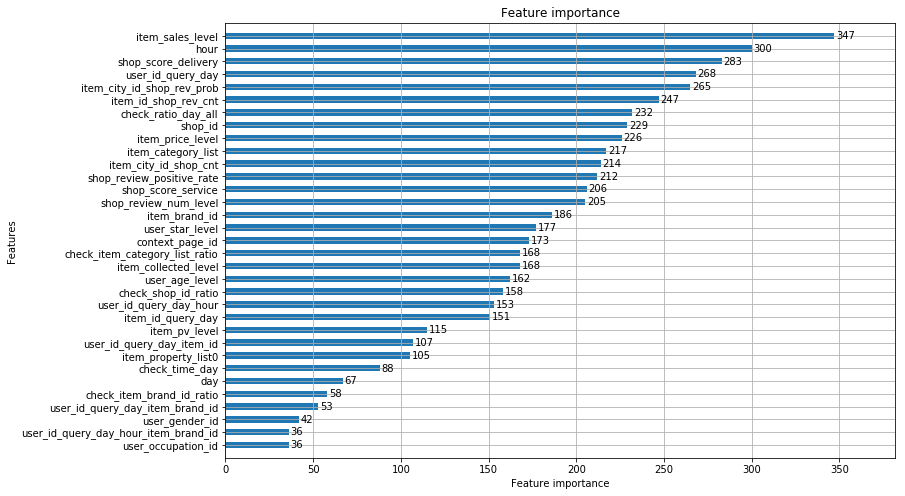

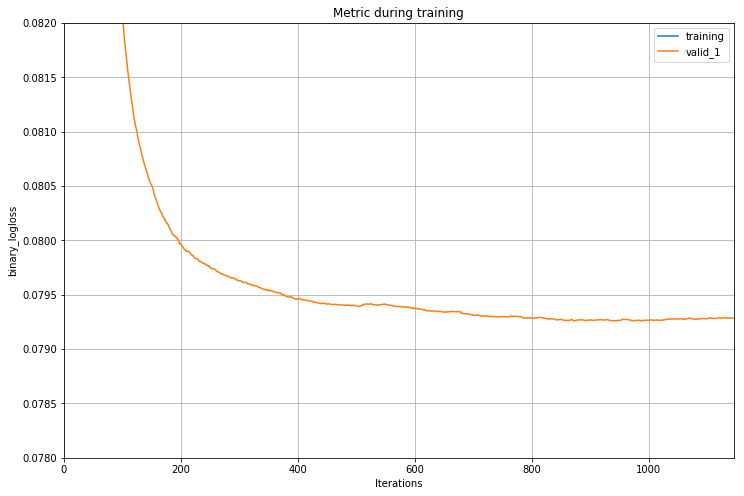

In [75]:
label = 'is_trade'
start_features = ['item_category_list', 'item_price_level', 
                  'item_sales_level', 
                  'item_collected_level', 'item_pv_level', 
                  'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 
                  'context_page_id', 'shop_review_num_level', 'shop_review_positive_rate', 
                  'shop_score_service', 'shop_score_delivery', 'hour', 'day', 'user_id_query_day_hour', 
                  'shop_id', 
                  'item_id_query_day',  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day', 'item_brand_id','user_id_query_day_item_id', 
                  'check_item_brand_id_ratio', 
                  'check_shop_id_ratio',
                  'check_item_category_list_ratio',
                  'check_ratio_day_all', 
                  'check_time_day',
                  'item_city_id_shop_cnt',
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt',
                  'item_property_list0'
                 ]
print(len(start_features))
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 7,
                          n_estimators=5000,max_depth=3,learning_rate = 0.05, subsample=1, n_jobs=30) #008154
#clf = xgb.XGBClassifier(n_estimators=5000,max_depth=4,learning_rate = 0.08, nthread=30)
clf = run(start_features, label, df, clf, True)
lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [3]:
df.shape

(496395, 295)

In [10]:
df = df[~pd.isnull(df.is_trade)]

In [11]:
item_category_list_unique = list(np.unique(df.item_category_list))
df.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)

In [22]:
col = [c for c in df if
           c not in ['is_trade', 'item_category_list', 'item_property_list', 'predict_category_property', 'instance_id',
                     'context_id', 'realtime', 'context_timestamp']]
for i in col[:]:
    if ('check' in i) | ('query' in i):
        col.remove(i)

In [21]:
col

['context_page_id',
 'item_brand_id',
 'item_city_id',
 'item_collected_level',
 'item_id',
 'item_price_level',
 'item_pv_level',
 'item_sales_level',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_score_delivery',
 'shop_score_description',
 'shop_score_service',
 'shop_star_level',
 'user_age_level',
 'user_gender_id',
 'user_id',
 'user_occupation_id',
 'user_star_level',
 'len_item_category',
 'len_item_property',
 'item_category_list1',
 'item_category_list2',
 'item_property_list0',
 'item_property_list1',
 'item_property_list2',
 'item_property_list3',
 'item_property_list4',
 'item_property_list5',
 'item_property_list6',
 'item_property_list7',
 'item_property_list8',
 'item_property_list9',
 'gender0',
 'age0',
 'occupation0',
 'star0',
 'hour',
 'day',
 'user_id_query_day',
 'user_id_query_day_hour',
 'item_id_query_day',
 'item_id_query_day_hour',
 'shop_id_query_day',
 'shop_id_query_day_hour',
 'item_category_list_query_day',
 'item_category_l

246
check_time_day
[1]	training's binary_logloss: 0.622052	valid_1's binary_logloss: 0.621692
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.561489	valid_1's binary_logloss: 0.560796
[3]	training's binary_logloss: 0.50933	valid_1's binary_logloss: 0.508331
[4]	training's binary_logloss: 0.464018	valid_1's binary_logloss: 0.462737
[5]	training's binary_logloss: 0.424379	valid_1's binary_logloss: 0.422821
[6]	training's binary_logloss: 0.389506	valid_1's binary_logloss: 0.387705
[7]	training's binary_logloss: 0.358676	valid_1's binary_logloss: 0.356627
[8]	training's binary_logloss: 0.331315	valid_1's binary_logloss: 0.329031
[9]	training's binary_logloss: 0.306952	valid_1's binary_logloss: 0.304439
[10]	training's binary_logloss: 0.285198	valid_1's binary_logloss: 0.282467
[11]	training's binary_logloss: 0.265723	valid_1's binary_logloss: 0.262793
[12]	training's binary_logloss: 0.248263	valid_1's binary_logloss: 0.245135
[13]	training's 

[107]	training's binary_logloss: 0.0872801	valid_1's binary_logloss: 0.0802868
[108]	training's binary_logloss: 0.0872481	valid_1's binary_logloss: 0.0802695
[109]	training's binary_logloss: 0.0872199	valid_1's binary_logloss: 0.0802536
[110]	training's binary_logloss: 0.0871914	valid_1's binary_logloss: 0.0802403
[111]	training's binary_logloss: 0.0871575	valid_1's binary_logloss: 0.0802102
[112]	training's binary_logloss: 0.0871336	valid_1's binary_logloss: 0.0801946
[113]	training's binary_logloss: 0.0871023	valid_1's binary_logloss: 0.0801693
[114]	training's binary_logloss: 0.0870815	valid_1's binary_logloss: 0.0801633
[115]	training's binary_logloss: 0.0870521	valid_1's binary_logloss: 0.0801564
[116]	training's binary_logloss: 0.0870262	valid_1's binary_logloss: 0.0801429
[117]	training's binary_logloss: 0.0870055	valid_1's binary_logloss: 0.0801204
[118]	training's binary_logloss: 0.0869793	valid_1's binary_logloss: 0.0801072
[119]	training's binary_logloss: 0.0869553	valid_1's

[212]	training's binary_logloss: 0.085469	valid_1's binary_logloss: 0.0794287
[213]	training's binary_logloss: 0.0854533	valid_1's binary_logloss: 0.0794191
[214]	training's binary_logloss: 0.0854434	valid_1's binary_logloss: 0.0794108
[215]	training's binary_logloss: 0.0854331	valid_1's binary_logloss: 0.07941
[216]	training's binary_logloss: 0.0854177	valid_1's binary_logloss: 0.0794128
[217]	training's binary_logloss: 0.0854051	valid_1's binary_logloss: 0.0794126
[218]	training's binary_logloss: 0.0853929	valid_1's binary_logloss: 0.0794135
[219]	training's binary_logloss: 0.085378	valid_1's binary_logloss: 0.0794077
[220]	training's binary_logloss: 0.0853651	valid_1's binary_logloss: 0.0794105
[221]	training's binary_logloss: 0.0853539	valid_1's binary_logloss: 0.0794053
[222]	training's binary_logloss: 0.0853393	valid_1's binary_logloss: 0.0793868
[223]	training's binary_logloss: 0.0853311	valid_1's binary_logloss: 0.0793816
[224]	training's binary_logloss: 0.085321	valid_1's bina

[317]	training's binary_logloss: 0.0843222	valid_1's binary_logloss: 0.0792733
[318]	training's binary_logloss: 0.0843139	valid_1's binary_logloss: 0.079264
[319]	training's binary_logloss: 0.0843024	valid_1's binary_logloss: 0.0792686
[320]	training's binary_logloss: 0.0842953	valid_1's binary_logloss: 0.0792735
[321]	training's binary_logloss: 0.0842849	valid_1's binary_logloss: 0.0792721
[322]	training's binary_logloss: 0.0842801	valid_1's binary_logloss: 0.0792702
[323]	training's binary_logloss: 0.0842618	valid_1's binary_logloss: 0.0792726
[324]	training's binary_logloss: 0.0842527	valid_1's binary_logloss: 0.0792708
[325]	training's binary_logloss: 0.0842452	valid_1's binary_logloss: 0.0792716
[326]	training's binary_logloss: 0.084234	valid_1's binary_logloss: 0.0792725
[327]	training's binary_logloss: 0.0842247	valid_1's binary_logloss: 0.0792652
[328]	training's binary_logloss: 0.0842147	valid_1's binary_logloss: 0.0792637
[329]	training's binary_logloss: 0.0842083	valid_1's b

[421]	training's binary_logloss: 0.0834474	valid_1's binary_logloss: 0.0791979
[422]	training's binary_logloss: 0.0834411	valid_1's binary_logloss: 0.0791928
[423]	training's binary_logloss: 0.0834283	valid_1's binary_logloss: 0.0791926
[424]	training's binary_logloss: 0.0834183	valid_1's binary_logloss: 0.0791915
[425]	training's binary_logloss: 0.0834087	valid_1's binary_logloss: 0.0791914
[426]	training's binary_logloss: 0.0834013	valid_1's binary_logloss: 0.0791896
[427]	training's binary_logloss: 0.0833929	valid_1's binary_logloss: 0.079187
[428]	training's binary_logloss: 0.0833811	valid_1's binary_logloss: 0.0791873
[429]	training's binary_logloss: 0.0833738	valid_1's binary_logloss: 0.0791862
[430]	training's binary_logloss: 0.0833676	valid_1's binary_logloss: 0.0791838
[431]	training's binary_logloss: 0.0833602	valid_1's binary_logloss: 0.0791846
[432]	training's binary_logloss: 0.0833499	valid_1's binary_logloss: 0.0791781
[433]	training's binary_logloss: 0.0833446	valid_1's 

[526]	training's binary_logloss: 0.0826834	valid_1's binary_logloss: 0.0792025
[527]	training's binary_logloss: 0.0826731	valid_1's binary_logloss: 0.0791931
[528]	training's binary_logloss: 0.0826658	valid_1's binary_logloss: 0.0791905
[529]	training's binary_logloss: 0.0826568	valid_1's binary_logloss: 0.0791946
[530]	training's binary_logloss: 0.0826488	valid_1's binary_logloss: 0.0791958
[531]	training's binary_logloss: 0.0826403	valid_1's binary_logloss: 0.0791834
[532]	training's binary_logloss: 0.0826322	valid_1's binary_logloss: 0.0791805
[533]	training's binary_logloss: 0.0826241	valid_1's binary_logloss: 0.0791769
[534]	training's binary_logloss: 0.0826147	valid_1's binary_logloss: 0.079178
[535]	training's binary_logloss: 0.0826095	valid_1's binary_logloss: 0.0791829
[536]	training's binary_logloss: 0.0826008	valid_1's binary_logloss: 0.079179
[537]	training's binary_logloss: 0.0825953	valid_1's binary_logloss: 0.0791736
[538]	training's binary_logloss: 0.082584	valid_1's bi

[631]	training's binary_logloss: 0.0819728	valid_1's binary_logloss: 0.0792097
[632]	training's binary_logloss: 0.0819657	valid_1's binary_logloss: 0.079203
[633]	training's binary_logloss: 0.0819581	valid_1's binary_logloss: 0.0792022
[634]	training's binary_logloss: 0.0819497	valid_1's binary_logloss: 0.0792026
[635]	training's binary_logloss: 0.0819421	valid_1's binary_logloss: 0.0792027
[636]	training's binary_logloss: 0.0819348	valid_1's binary_logloss: 0.0792026
[637]	training's binary_logloss: 0.081929	valid_1's binary_logloss: 0.0792
[638]	training's binary_logloss: 0.0819275	valid_1's binary_logloss: 0.0792004
[639]	training's binary_logloss: 0.0819203	valid_1's binary_logloss: 0.0791967
[640]	training's binary_logloss: 0.0819139	valid_1's binary_logloss: 0.0791995
[641]	training's binary_logloss: 0.0819086	valid_1's binary_logloss: 0.0792007
[642]	training's binary_logloss: 0.0819041	valid_1's binary_logloss: 0.079204
[643]	training's binary_logloss: 0.0818961	valid_1's binar

[735]	training's binary_logloss: 0.0813091	valid_1's binary_logloss: 0.079289
[736]	training's binary_logloss: 0.0813009	valid_1's binary_logloss: 0.0792884
[737]	training's binary_logloss: 0.0812945	valid_1's binary_logloss: 0.0792887
[738]	training's binary_logloss: 0.0812905	valid_1's binary_logloss: 0.0792913
[739]	training's binary_logloss: 0.0812846	valid_1's binary_logloss: 0.0792937
[740]	training's binary_logloss: 0.0812779	valid_1's binary_logloss: 0.0792934
[741]	training's binary_logloss: 0.0812756	valid_1's binary_logloss: 0.0792946
[742]	training's binary_logloss: 0.0812706	valid_1's binary_logloss: 0.0792955
[743]	training's binary_logloss: 0.0812628	valid_1's binary_logloss: 0.0793017
[744]	training's binary_logloss: 0.081255	valid_1's binary_logloss: 0.0793031
[745]	training's binary_logloss: 0.081246	valid_1's binary_logloss: 0.0793008
[746]	training's binary_logloss: 0.0812388	valid_1's binary_logloss: 0.0793043
[747]	training's binary_logloss: 0.081233	valid_1's bin

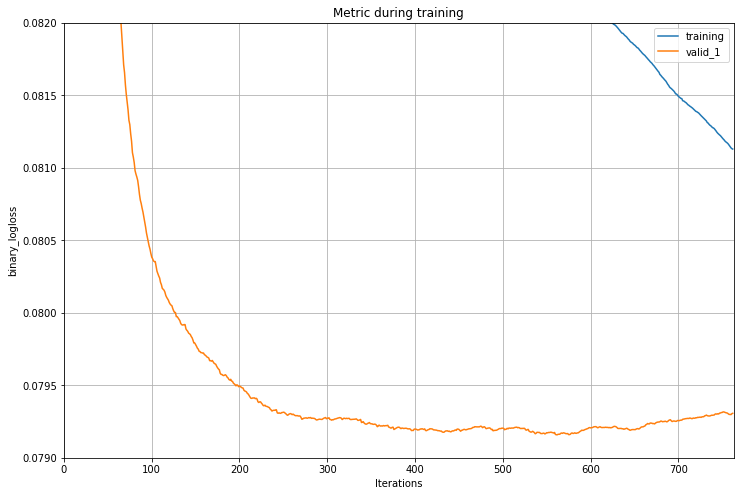

check_ratio_day_all: 0.037668798862828715
item_id_user_prob: 0.02736318407960199
shop_score_delivery: 0.020966595593461264
user_cntx: 0.01990049751243781
predict_category_property0: 0.01990049751243781
check_item_category_list_ratio: 0.019189765458422176
sale_price: 0.017768301350390904
hour: 0.017057569296375266
item_price_level: 0.016346837242359632
check_shop_id_ratio: 0.015636105188343994
item_price_level_user_age_prob: 0.013148542999289269
user_id_query_day: 0.012437810945273632
gender_star: 0.011727078891257996
item_collected_level_salse_prob: 0.011727078891257996
predict_category_property3: 0.011727078891257996
user_star_level_user_age_prob: 0.011371712864250177
len_item_property: 0.011371712864250177
shop_review_positive_rate: 0.01101634683724236
item_category_list1: 0.01101634683724236
context_page_id: 0.010660980810234541
user_id_query_day_item_id: 0.010660980810234541
item_sales_level: 0.009950248756218905
item_brand_id_user_prob: 0.008884150675195452
item_collected_level_it

In [65]:
label = 'is_trade'
start_features = col + ['item_category_list', 'user_id_query_day_hour', 'shop_id','item_id_query_day',  'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'item_brand_id','user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio','check_item_category_list_ratio','check_ratio_day_all','check_time_day']
print(len(start_features))
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=5000,max_depth=3,learning_rate = 0.08, n_jobs=30) #008154
#clf = xgb.XGBClassifier(n_estimators=5000,max_depth=4,learning_rate = 0.08, nthread=30)
clf = run(start_features, label, df, clf, True)
#lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
#plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.079,0.082))
plt.show()
fe = np.array(start_features)[np.argsort(clf.feature_importances_)][::-1]
for i,j in zip(fe, clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1]):
    print('{}: {}'.format(i,j / np.sum(clf.feature_importances_)))

In [64]:
T = []
fe = np.array(start_features)[np.argsort(clf.feature_importances_)][::-1]
for i,j in zip(fe, clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1]):
    print('{}: {}'.format(i,j / np.sum(clf.feature_importances_)))

item_sales_level: 0.0817258883248731
shop_score_delivery: 0.05583756345177665
hour: 0.05482233502538071
item_category_list: 0.05482233502538071
shop_review_num_level: 0.053553299492385784
item_price_level: 0.053045685279187814
user_id_query_day: 0.05279187817258883
item_id_query_day: 0.049238578680203045
shop_review_positive_rate: 0.044923857868020306
check_ratio_day_all: 0.0434010152284264
shop_id: 0.04289340101522843
item_collected_level: 0.03883248730964467
item_brand_id: 0.03857868020304569
shop_score_service: 0.03680203045685279
user_age_level: 0.03248730964467005
context_page_id: 0.03248730964467005
user_star_level: 0.03248730964467005
check_item_category_list_ratio: 0.032233502538071064
item_pv_level: 0.02969543147208122
user_id_query_day_hour: 0.02918781725888325
check_shop_id_ratio: 0.02715736040609137
user_id_query_day_item_id: 0.02030456852791878
check_time_day: 0.013959390862944163
day: 0.011928934010152284
check_item_brand_id_ratio: 0.01015228426395939
user_gender_id: 0.00